# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = merged_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Checking the number of mice.249
len(merged_df['Mouse ID'].unique())

249

In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df[merged_df['Mouse ID'] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [61]:
# Optional: Get all the data for the duplicate mouse ID. 


In [62]:
# Checking the number of mice in the clean DataFrame.
len(merged_df['Mouse ID'].unique())

249

Why would all g989 rows be deleted? I only removed duplicate rows were Mouse ID and Timepoint were the same per instructions, and did not delete entire mouse (hence why total still remained at 249).

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics_df = pd.DataFrame({
    'Mean Tumor Volume': merged_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'],
    'Median Tumor Volume': merged_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)'],
    'Tumor Volume Variance': merged_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)'],
    'Tumor Volume Std. Dev.': merged_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)'],
    'Tumor Volume Std. Err.': merged_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
})
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

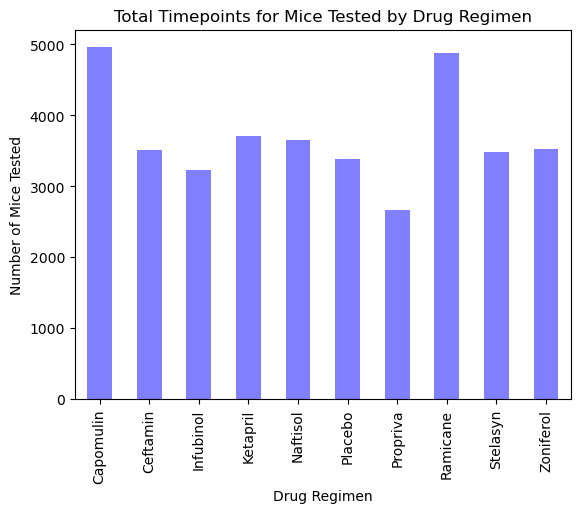

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped_data = merged_df.groupby('Drug Regimen')['Timepoint'].sum()
ax = grouped_data.plot(kind='bar', color='blue', alpha=0.5)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Mice Tested')
ax.set_title('Total Timepoints for Mice Tested by Drug Regimen')
plt.show()


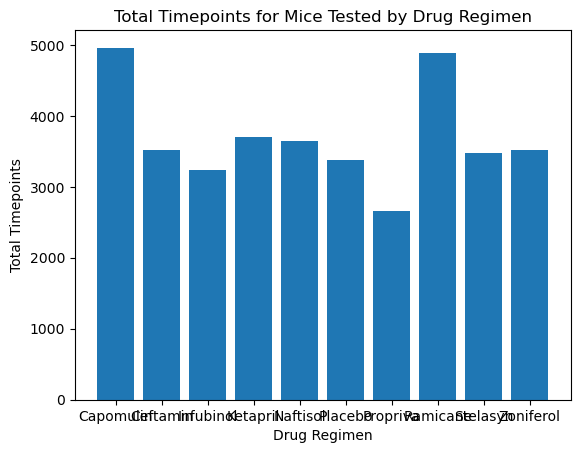

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.title('Total Timepoints for Mice Tested by Drug Regimen')
plt.show()


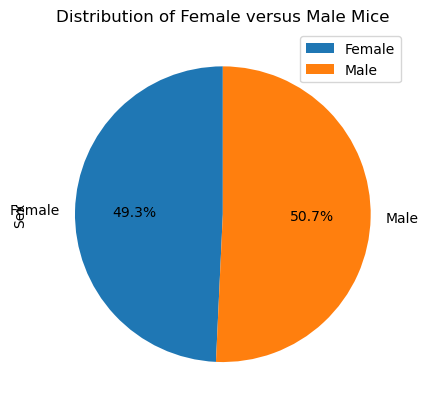

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = merged_df.groupby('Sex')['Sex'].count()
ax = sex_data.plot(kind='pie', autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Female versus Male Mice')
ax.legend(['Female', 'Male'])
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_df[merged_df['Drug Regimen'].isin(regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'])
final_volume = final_volume.set_index('Mouse ID')['Tumor Volume (mm3)']
print(final_volume)

Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    38.407618
a444    43.047543
          ...    
y769    68.594745
y793    31.896238
y865    64.729837
z578    30.638696
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    filtered_data = merged_df[merged_df['Drug Regimen'] == treatment]
    volumes = merged_df['Tumor Volume (mm3)']
    tumor_volumes.append(volumes)
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    
    print(f"{treatment} IQR: {iqr}")
    if len(outliers) == 0:
        print(f"{treatment} has no potential outliers.")
    else:
        print(f"{treatment} potential outliers: {outliers}")

Capomulin IQR: 11.324075107499993
Capomulin potential outliers: 7       26.546993
8       24.365505
9       22.050126
18      25.472143
19      23.343598
567     74.997764
679     74.040390
850     73.324432
930     74.104086
1043    73.715619
1151    73.693494
1152    76.668817
1179    75.123690
1203    73.901399
1277    78.567014
1353    74.106091
1354    75.294936
1571    75.113288
1892    73.867845
Name: Tumor Volume (mm3), dtype: float64
Ramicane IQR: 11.324075107499993
Ramicane potential outliers: 7       26.546993
8       24.365505
9       22.050126
18      25.472143
19      23.343598
567     74.997764
679     74.040390
850     73.324432
930     74.104086
1043    73.715619
1151    73.693494
1152    76.668817
1179    75.123690
1203    73.901399
1277    78.567014
1353    74.106091
1354    75.294936
1571    75.113288
1892    73.867845
Name: Tumor Volume (mm3), dtype: float64
Infubinol IQR: 11.324075107499993
Infubinol potential outliers: 7       26.546993
8       24.365505
9       

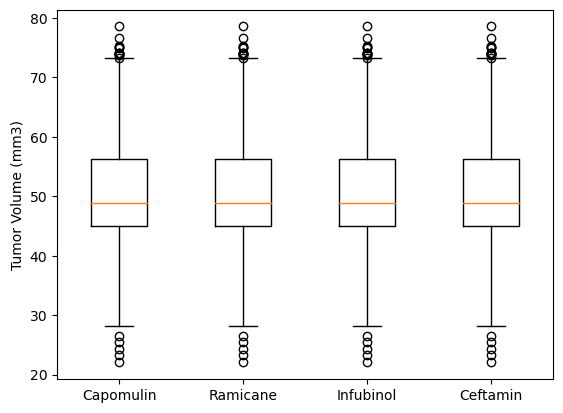

In [69]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []
for treatment in treatments:
    filtered_data = merged_df[merged_df['Drug Regimen'] == treatment]
    volumes = merged_df['Tumor Volume (mm3)']
    tumor_volumes.append(volumes)
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes)
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

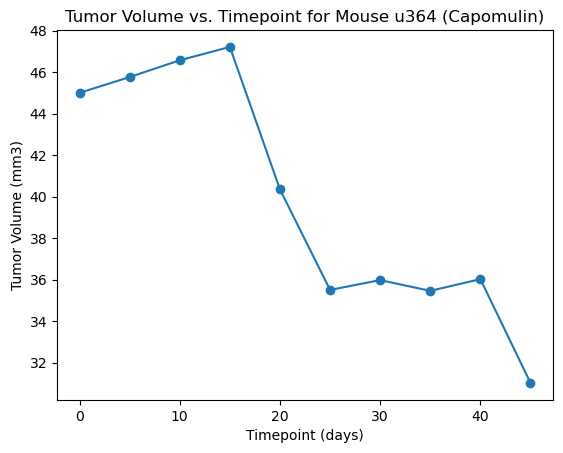

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].sample().values[0]
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]
fig, ax = plt.subplots()
ax.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')
ax.set_xlabel('Timepoint (days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)')
plt.show()

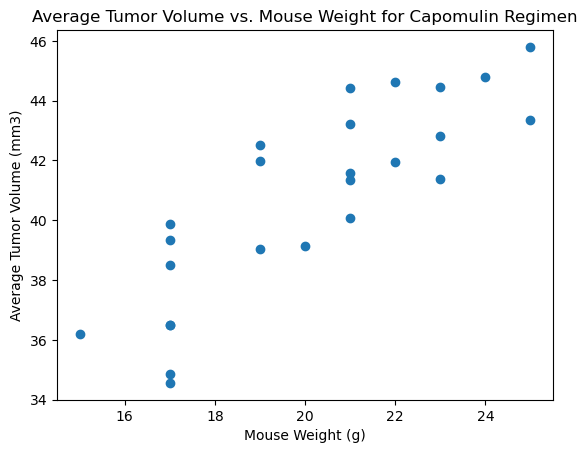

In [71]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
fig, ax = plt.subplots()
ax.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
ax.set_xlabel('Mouse Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.set_title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84.


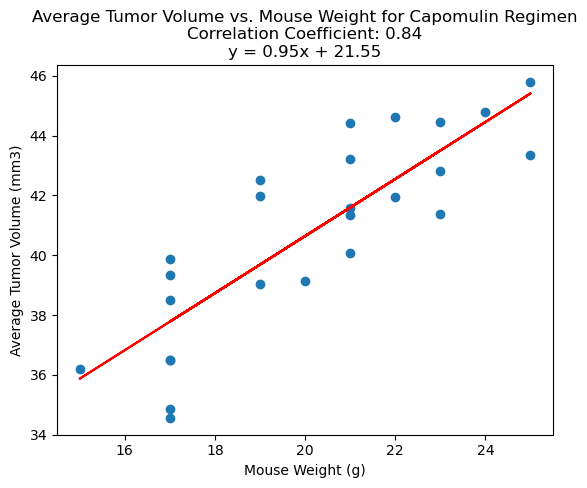

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
corr_coefficient = round(grouped_data['Weight (g)'].corr(grouped_data['Tumor Volume (mm3)']), 2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {corr_coefficient}.")
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
fig, ax = plt.subplots()
ax.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
ax.plot(grouped_data['Weight (g)'], slope*grouped_data['Weight (g)']+intercept, color='r')
ax.set_xlabel('Mouse Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.set_title(f"Average Tumor Volume vs. Mouse Weight for Capomulin Regimen\nCorrelation Coefficient: {corr_coefficient}\n{line_eq}")
plt.show()